In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
my_data=pd.read_csv('C:\\Users\\super\\Desktop\\ECK-Train\\home.txt',names=["size","bedroom","price"])
my_data.head()

,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


# Normalize the Data

In [35]:
my_data=(my_data-my_data.mean())/my_data.std()
my_data.head()

,size,bedroom,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


### Setting the matrices

In [36]:
X=my_data.iloc[:,0:2]
ones=np.ones([X.shape[0],1])
X=np.concatenate((ones,X),axis=1)

In [37]:
X[0:5]

array([[ 1.        ,  0.13000987, -0.22367519],
       [ 1.        , -0.50418984, -0.22367519],
       [ 1.        ,  0.50247636, -0.22367519],
       [ 1.        , -0.73572306, -1.53776691],
       [ 1.        ,  1.25747602,  1.09041654]])

In [38]:
y=my_data.iloc[:,2:3].values
theta=np.zeros([1,3])


In [39]:
y[0:5]

array([[ 0.47574687],
       [-0.08407444],
       [ 0.22862575],
       [-0.86702453],
       [ 1.59538948]])

In [40]:
theta

array([[0., 0., 0.]])

In [64]:
#compute cost
def computecost(X,y,theta):
    tobesummed=np.power(((X@theta.T)-y),2)
    return np.sum(tobesummed)/(2*len(X))
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta-(alpha/len(X))*np.sum(X*(X@theta.T-y),axis=0)
        cost[i] = computecost(X,y,theta)
    return theta,cost


In [65]:
#set hyper parameters
alpha=0.01
iters=1000


In [66]:
tempCost=computecost(X,y,theta)
print(tempCost)

0.48936170212765967


In [67]:
#running the gd and cost function
g,cost = gradientDescent(X,y,theta,iters,alpha)
print(g)


[[-1.10868761e-16  8.78503652e-01 -4.69166570e-02]]


In [68]:
finalCost = computecost(X,y,g)
print(finalCost)

0.13070336960771892


Text(0.5, 1.0, 'Error vs. Training Epoch')

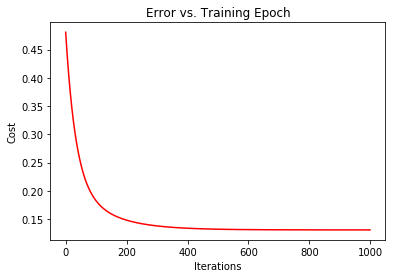

In [71]:
#plot the cost

fig, ax = plt.subplots()

ax.plot(np.arange(iters), cost, 'r')

ax.set_xlabel('Iterations')

ax.set_ylabel('Cost')

ax.set_title('Error vs. Training Epoch')